In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s3e23/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e23/test.csv')

In [4]:
train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [5]:
test.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [6]:
test.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [7]:
test.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67842 entries, 0 to 67841
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67842 non-null  int64  
 1   loc                67842 non-null  float64
 2   v(g)               67842 non-null  float64
 3   ev(g)              67842 non-null  float64
 4   iv(g)              67842 non-null  float64
 5   n                  67842 non-null  float64
 6   v                  67842 non-null  float64
 7   l                  67842 non-null  float64
 8   d                  67842 non-null  float64
 9   i                  67842 non-null  float64
 10  e                  67842 non-null  float64
 11  b                  67842 non-null  float64
 12  t                  67842 non-null  float64
 13  lOCode             67842 non-null  int64  
 14  lOComment          67842 non-null  int64  
 15  lOBlank            67842 non-null  int64  
 16  locCodeAndComment  678

In [10]:
train=train.drop('id',axis=1)
X_train=train.drop('defects',axis=1)
y_train=train['defects']

In [11]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)

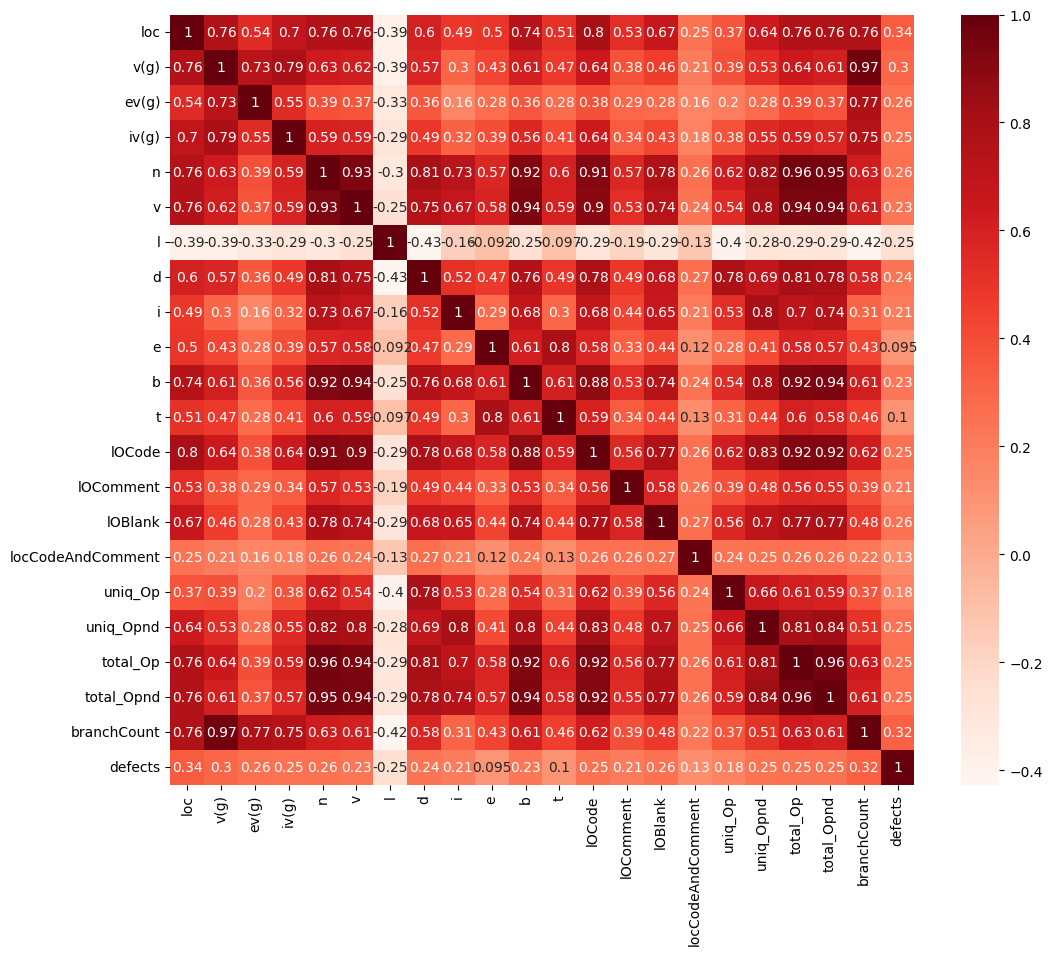

In [12]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

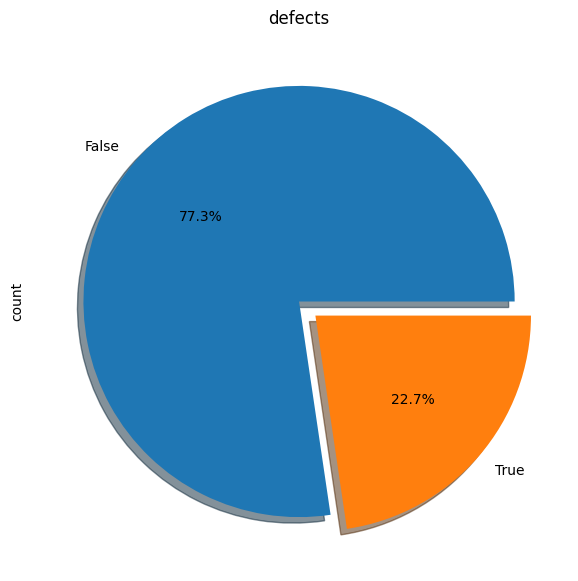

In [13]:
fig, ax = plt.subplots(figsize=(7, 7))
train['defects'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
ax.set_title('defects')
plt.show()

Accuracy: 0.811296836767784
Classification Report:               precision    recall  f1-score   support

       False       0.83      0.95      0.89     78699
        True       0.66      0.35      0.45     23064

    accuracy                           0.81    101763
   macro avg       0.75      0.65      0.67    101763
weighted avg       0.79      0.81      0.79    101763

Confusion Matrix: [[74600  4099]
 [15104  7960]]
ROC AUC Score: 0.6465210398253524


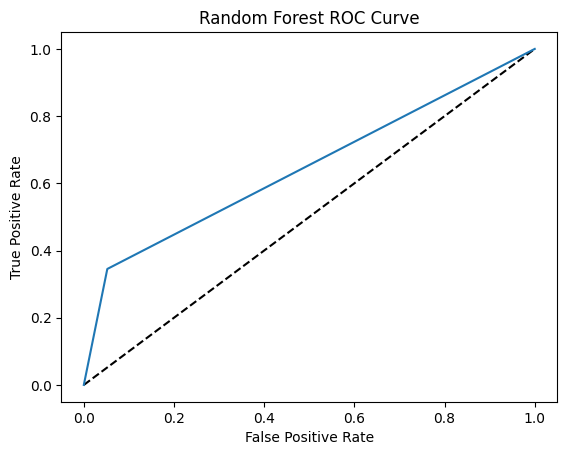

In [14]:
rf=RandomForestClassifier(n_estimators=100,max_depth=5,max_features=1,random_state=42)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_train)
print('Accuracy:',accuracy_score(y_train,y_pred_rf))
print('Classification Report:',classification_report(y_train,y_pred_rf))
print('Confusion Matrix:',confusion_matrix(y_train,y_pred_rf))
print('ROC AUC Score:',roc_auc_score(y_train,y_pred_rf))

fpr, tpr, thresholds = roc_curve(y_train, y_pred_rf)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

Accuracy: 0.8305572752375617
Classification Report:               precision    recall  f1-score   support

       False       0.85      0.95      0.90     78699
        True       0.72      0.42      0.53     23064

    accuracy                           0.83    101763
   macro avg       0.78      0.69      0.71    101763
weighted avg       0.82      0.83      0.81    101763

Confusion Matrix: [[74842  3857]
 [13386  9678]]


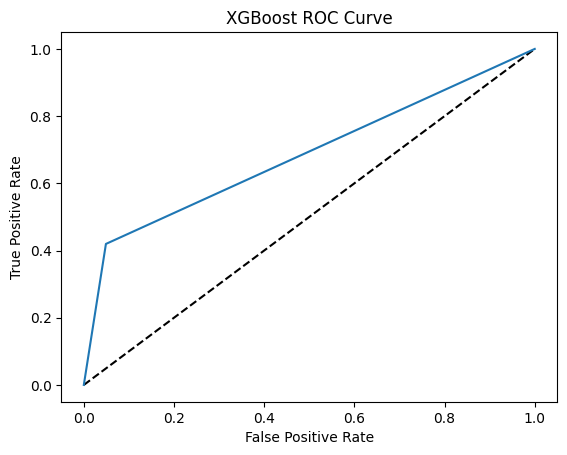

In [15]:
xg=XGBClassifier(n_estimators=100,max_depth=5,min_child_weight=1,max_delta_step=0,random_state=42)
xg.fit(X_train,y_train)

y_pred_xg=xg.predict(X_train)
print('Accuracy:',accuracy_score(y_train,y_pred_xg))
print('Classification Report:',classification_report(y_train,y_pred_xg))
print('Confusion Matrix:',confusion_matrix(y_train,y_pred_xg))

fpr, tpr, thresholds = roc_curve(y_train, y_pred_xg)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()

[LightGBM] [Info] Number of positive: 23064, number of negative: 78699
[LightGBM] [Info] Total Bins 3581
[LightGBM] [Info] Number of data points in the train set: 101763, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.226644 -> initscore=-1.227357
[LightGBM] [Info] Start training from score -1.227357
Accuracy: 0.8227843125694014
Classification Report:               precision    recall  f1-score   support

       False       0.84      0.94      0.89     78699
        True       0.68      0.41      0.51     23064

    accuracy                           0.82    101763
   macro avg       0.76      0.68      0.70    101763
weighted avg       0.81      0.82      0.81    101763

Confusion Matrix: [[74341  4358]
 [13676  9388]]


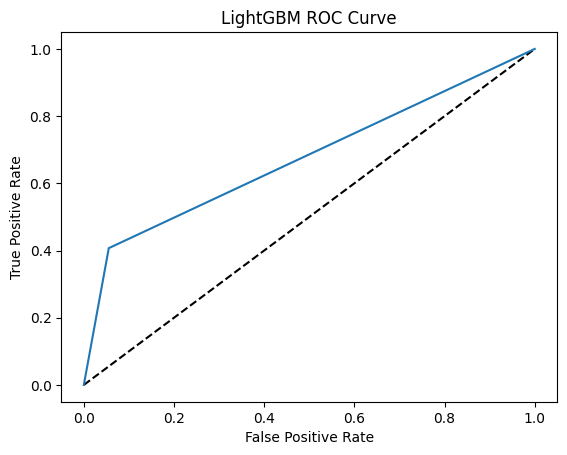

In [16]:
lg=LGBMClassifier(n_estimators=100,force_col_wise=True,random_state=42)
lg.fit(X_train,y_train)

y_pred_lg=lg.predict(X_train)
print('Accuracy:',accuracy_score(y_train,y_pred_lg))
print('Classification Report:',classification_report(y_train,y_pred_lg))
print('Confusion Matrix:',confusion_matrix(y_train,y_pred_lg))

fpr, tpr, thresholds = roc_curve(y_train, y_pred_lg)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.show()

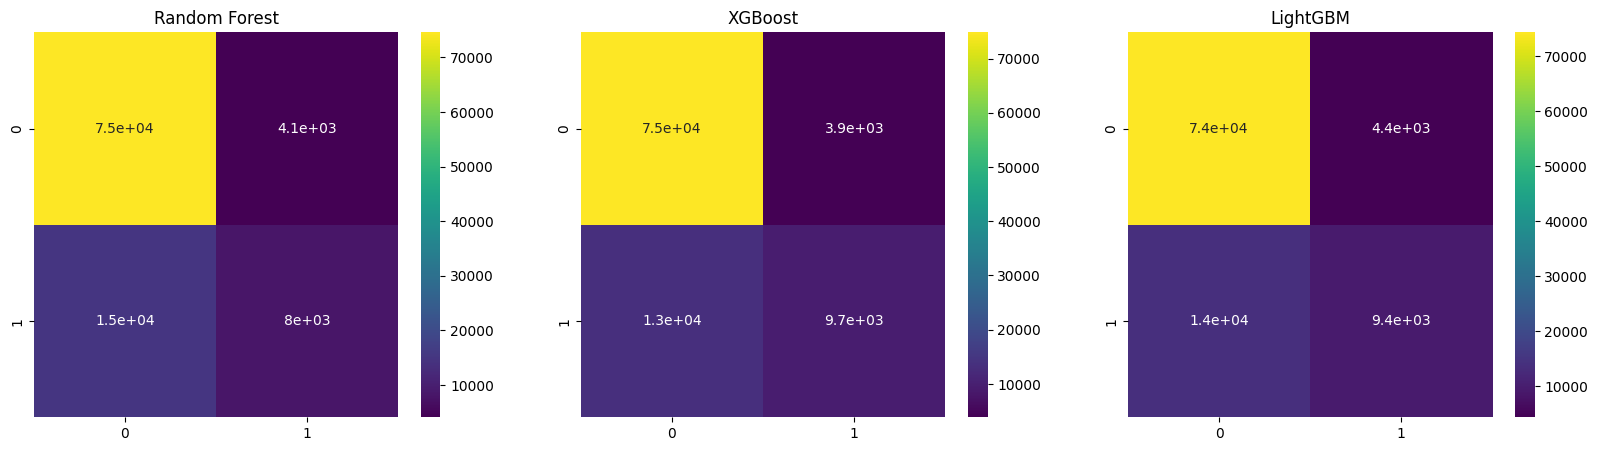

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(confusion_matrix(y_train,y_pred_rf), annot=True, cmap='viridis', ax=ax[0])
ax[0].set_title('Random Forest')
sns.heatmap(confusion_matrix(y_train,y_pred_xg), annot=True, cmap='viridis', ax=ax[1])
ax[1].set_title('XGBoost')
sns.heatmap(confusion_matrix(y_train,y_pred_lg), annot=True, cmap='viridis', ax=ax[2])
ax[2].set_title('LightGBM')
plt.show()

In [18]:
y_test=xg.predict(test.drop('id',axis=1))
submission=pd.DataFrame({'id':test['id'],'defects':y_test})
submission.to_csv('submission.csv',index=False)